### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading the "loan.csv" csv file 
### Checking the first 5 rows of our dataframe

In [4]:
#inp0 = pd.read_csv("loan.csv",on_bad_lines='skip')
inp0 = pd.read_csv(r"C:\Users\Keert\OneDrive\Desktop\Atmecs\Resume study\Projects\Gramener Case Study\loan.csv")
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Inspecting the dataframe

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
inp0.shape

(39717, 111)

In [7]:
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## DATA CLEANING

### Dealing with missing values

#### Let's find the percentage of missing values in each column.

In [8]:
per=round(inp0.isnull().sum()/len(inp0.index), 2)*100
per

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Dropping the columns having missing values .

In [9]:
missing_columns= inp0.columns[per > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
inp0=inp0.drop(missing_columns,axis=1)
inp0.shape

(39717, 55)

In [11]:
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
round(100*(inp0.isnull().sum()/len(inp0.index)))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

#### There are 33% and 65% missing values in desc and mths_since_last_delinq.
#### Analyzing them and drop if necessary

In [13]:
inp0.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [14]:
inp0[['desc','mths_since_last_delinq']].head()


,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [15]:
inp0=inp0.drop(['desc','mths_since_last_delinq'],axis=1)


In [16]:
inp0.shape

(39717, 53)

In [17]:
#Dropping certain columns that gives us additional information on  customers, 
#loan parameters,Customer behavior attributes and other fields that we do not need for our analysis.
inp1 = inp0.drop(['installment',  'emp_title','pymnt_plan', 'url','title',
       'zip_code', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies','tax_liens'], axis = 1)

In [18]:
inp1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti'],
      dtype='object')

In [19]:
#We can also remove id, member_id columns which will be of no use for our analysis
inp1=inp1.drop(["id","member_id"],axis=1)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [20]:
inp1.shape

(39717, 16)

#### Lets check the missing values row wise

In [21]:
inp1.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Length: 39717, dtype: int64

In [22]:
len(inp1[inp1.isnull().sum(axis=1)>5].index)

0

#### Lets check the format for all columns

In [23]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [24]:
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [25]:
# let's convert int_rate which is of object type into float.
inp1['int_rate']=inp1['int_rate'].str.replace('%', '').astype(float)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [26]:
#Converting emp_length data type
inp1.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
inp1['emp_length'] = inp1['emp_length'].str.replace('years', '')

In [28]:
inp1['emp_length'] = inp1['emp_length'].str.strip('+ ')

In [29]:
inp1['emp_length'] = inp1['emp_length'].str.replace('< 1 year', '0')

In [30]:
inp1['emp_length'] = inp1['emp_length'].str.replace('year', '')

In [31]:
inp1[inp1['emp_length'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
168,2500,2500,2500.00000,36 months,7.51,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,CA,16.30
323,18000,18000,18000.00000,60 months,17.58,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,AL,21.96
394,4000,4000,4000.00000,36 months,11.71,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,FL,7.50
422,1000,1000,1000.00000,36 months,14.65,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,NJ,6.00
439,8250,8250,8250.00000,36 months,7.51,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,MD,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,10000,9975.00000,36 months,14.22,C,C5,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,small_business,PA,4.51
32608,3700,3700,3700.00000,36 months,14.22,C,C5,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,other,TX,3.36
32621,10000,10000,9731.17513,36 months,14.22,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,other,MA,3.83
32631,6000,6000,6000.00000,36 months,12.73,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,moving,MN,12.80


In [32]:
inp1 = inp1[~inp1['emp_length'].isnull()]
inp1['emp_length'] =inp1['emp_length'].astype(int)

In [33]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt          38642 non-null  int64  
 2   funded_amnt_inv      38642 non-null  float64
 3   term                 38642 non-null  object 
 4   int_rate             38642 non-null  float64
 5   grade                38642 non-null  object 
 6   sub_grade            38642 non-null  object 
 7   emp_length           38642 non-null  int32  
 8   home_ownership       38642 non-null  object 
 9   annual_inc           38642 non-null  float64
 10  verification_status  38642 non-null  object 
 11  issue_d              38642 non-null  object 
 12  loan_status          38642 non-null  object 
 13  purpose              38642 non-null  object 
 14  addr_state           38642 non-null  object 
 15  dti                  38642 non-null 

In [34]:
# Lets convert term data type
inp1.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [35]:
inp1.term = inp1.term.str.replace("months","")

In [36]:
inp1.term = inp1.term.astype(int)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60,12.69,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [37]:
inp1.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [38]:
# We can drop 'current' from loan_status because it's neither fully paid nor a defaulter. 
#We need only fully paid and charged off for our analysis.
inp1=inp1[inp1.loan_status!='Current']
inp1.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [39]:
inp1.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [40]:
# We can remove other from purpose column since we don't know what other stands for.
inp1.drop(inp1[inp1.purpose=='other'].index,inplace=True)

In [41]:
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [42]:
inp1.annual_inc.describe()

count    3.383100e+04
mean     7.003334e+04
std      6.596019e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [43]:
# We need to remove the outliers present. Here is a huge difference between the mean and the max values in the annual_inc column.
outliers =inp1['annual_inc'].quantile(0.9)
inp1 = inp1[inp1["annual_inc"] < outliers]
inp1["annual_inc"].describe()


count     30437.000000
mean      58356.306074
std       23614.428667
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      117996.000000
Name: annual_inc, dtype: float64

In [44]:
outliers1 =inp1['annual_inc'].quantile([0.1, 0.25, 0.5, 0.75, 1.0])#df.quantile([0.1, 0.25, 0.5, 0.75], axis=0)

print(outliers1)

0.10     30000.0
0.25     40000.0
0.50     55000.0
0.75     75000.0
1.00    117996.0
Name: annual_inc, dtype: float64


In [45]:
# Let's derive month and year from issue_d column
inp1['issue_month'],inp1['issue_year'] = inp1['issue_d'].str.split('-', 1).str
inp1['issue_year'] = '20'+ inp1['issue_year']
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011


In [46]:
# Creating loan to income ratio column
inp1['loan_inc_ratio']= 100*(inp1['loan_amnt']/inp1['annual_inc'])
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350


In [47]:
inp1.loan_inc_ratio.describe()

count    30437.000000
mean        19.779710
std         11.576357
min          0.869565
25%         10.908694
50%         17.647059
75%         26.662096
max         83.000000
Name: loan_inc_ratio, dtype: float64

In [48]:
# Categorising loan_inc_ratio into categorised_loan_inc_ratio
def loan_inc_ratio_category(n):
    if n < 10:
        return 'Low'
    elif n >=10 and n < 17:
        return 'Medium'
    elif n >= 17 and n < 25:
        return 'High'
    else:
        return 'Very High'
    
inp1['categorised_loan_inc_ratio'] = inp1['loan_inc_ratio'].apply(loan_inc_ratio_category)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium


In [49]:
# Splitting the values in int_rate column according to low, medium,high,very high
def interest_rates(n):
    if n < 9:
        return 'Low'
    elif n >=9 and n < 12:
        return 'Medium'
    elif n >= 12 and n < 14:
        return 'High'
    else:
        return 'Very High'
    
inp1['categorised_int_rate_perc'] = inp1['int_rate'].apply(interest_rates)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low,Very High
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High,Very High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High


In [50]:
inp1['emp_length'].quantile([.25, .5, .75])

0.25    2.0
0.50    4.0
0.75    8.0
Name: emp_length, dtype: float64

In [51]:
# Like we did for int_rate column, 
#let's catagorize the emp_length into categorised_emp_length based on levels(Entry,junior,middle,senior)
def emp_length_category(n):
    if n < 2:
        return 'Entry Level'
    elif n >=2 and n < 4:
        return 'Junior Level'
    elif n >= 4 and n < 9:
        return 'Middle Level'
    else:
        return 'Senior Level'
    
inp1['categorised_emp_length'] = inp1['emp_length'].apply(emp_length_category)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level


In [52]:
inp1['annual_inc'].quantile([.25, .5, .75])

0.25    40000.0
0.50    55000.0
0.75    75000.0
Name: annual_inc, dtype: float64

In [53]:
# Let's categorize annual_inc column into categorised_annual_inc into(loe,medium,high,very high)
def annual_income_category(n):
    if n < 41000:
        return 'Low'
    elif n >=41000 and n < 60000:
        return 'Medium'
    elif n >= 60000 and n < 83000:
        return 'High'
    else:
        return 'Very High'
    
inp1['categorised_annual_inc'] = inp1['annual_inc'].apply(annual_income_category)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,car,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium


In [54]:
inp1['dti'].quantile([.25, .5, .75])

0.25     8.67
0.50    13.84
0.75    18.90
Name: dti, dtype: float64

In [55]:
# Categorizing dti into categorised_dti ( low,medium,high,very high)
def dti_category(n):
    if n < 8:
        return 'Low'
    elif n >=8 and n < 13:
        return 'Medium'
    elif n >= 13 and n < 19:
        return 'High'
    else:
        return 'Very High'
    
inp1['categorised_dti'] = inp1['dti'].apply(dti_category)
inp1.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low,Very High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low,Medium
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium,Very High


In [56]:
inp1['loan_amnt'].quantile([.25, .5, .75])

0.25     5550.0
0.50     9600.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [57]:
#  Categorizing loan_amnt into categorised_loan_amnt ( low,medium,high,very high)
def loan_amount_category(n):
    if n < 5400:
        return 'Low'
    elif n >=5400 and n < 9600:
        return 'Medium'
    elif n >= 9600 and n < 15000:
        return 'High'
    else:
        return 'Very High'
    
inp1['categorised_loan_amnt'] =inp1['loan_amnt'].apply(loan_amount_category)
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti,categorised_loan_amnt
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low,Very High,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low,Medium,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium,Very High,Medium


In [58]:
inp1.shape

(30437, 25)

In [100]:
inp1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'issue_month', 'issue_year', 'loan_inc_ratio',
       'categorised_loan_inc_ratio', 'categorised_int_rate_perc',
       'categorised_emp_length', 'categorised_annual_inc', 'categorised_dti',
       'categorised_loan_amnt'],
      dtype='object')

### Data Analysis
### Univariate analysis

#### Let's find out the customers who are fully paid and who are charged off.

In [59]:
inp1.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
5         Fully Paid
6         Fully Paid
            ...     
39711     Fully Paid
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 30437, dtype: object

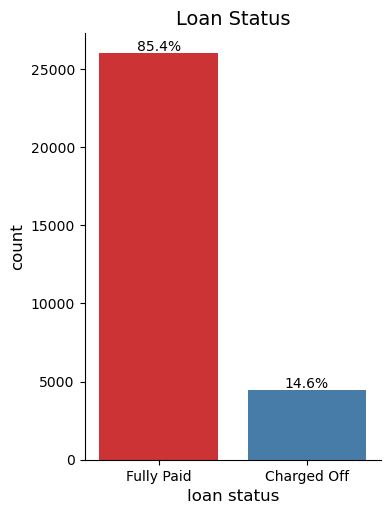

In [60]:
#Plotting categorical plot for univariate analysis
plot = sns.catplot(x='loan_status', kind="count", data=inp1, palette="Set1", aspect= .8);
plt.title('Loan Status', fontsize = 14)
plt.xlabel("loan status", fontsize = 12)
plt.ylabel("count", fontsize = 12)

total = len(inp1)
for p in plot.ax.patches:
    height = p.get_height()
    plot.ax.annotate(f'{height / total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()


#### The graph above depicts that 14.6% customers have defaulted and 85.4% have fully paid

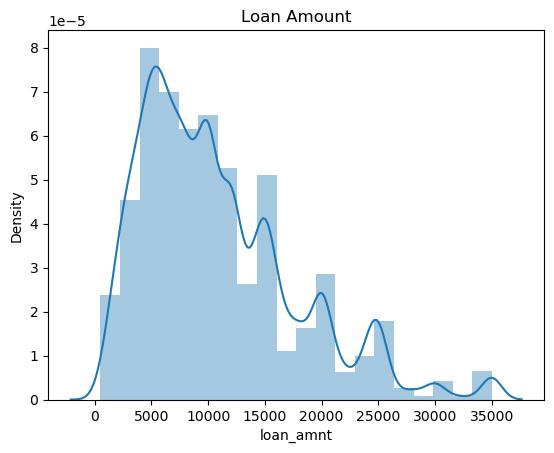

In [61]:
# Distribution of loan amount
sns.distplot(inp1['loan_amnt'], bins=20)
plt.title('Loan Amount')
plt.show()

#### The above graph shows that spread of loan amount is around 6000-18000 approx.

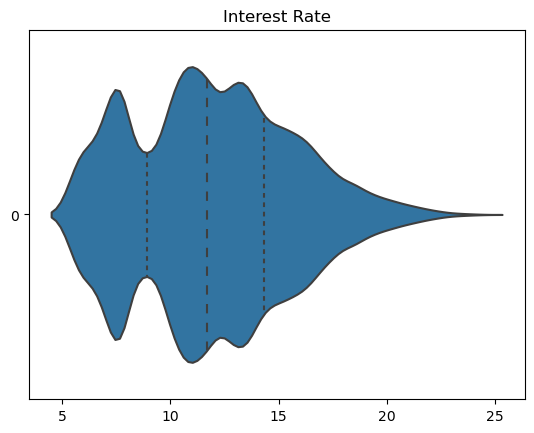

In [62]:
# Distribution of interest_rate
sns.violinplot(inp1['int_rate'], inner='quartile',orient="h")
plt.title('Interest Rate')
plt.show()

#### The spread of interest rate at the interquartile range (8% to 14%) is higher.

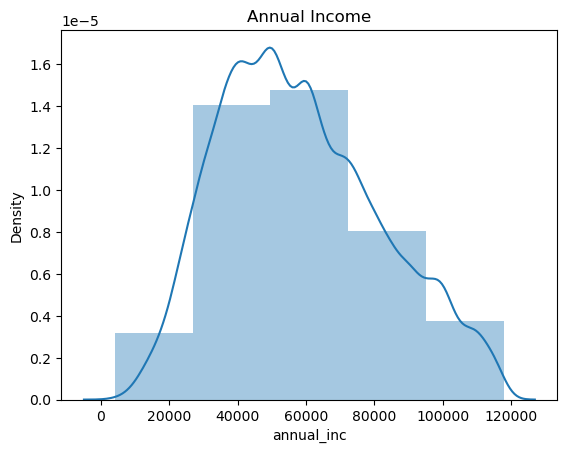

In [63]:
# Distribution of annual income
sns.distplot(inp1['annual_inc'],bins = 5)
plt.title('Annual Income')
plt.show()

#### The above graph shows that the distribution of annual income of range between 25000 and 90000 is higher.

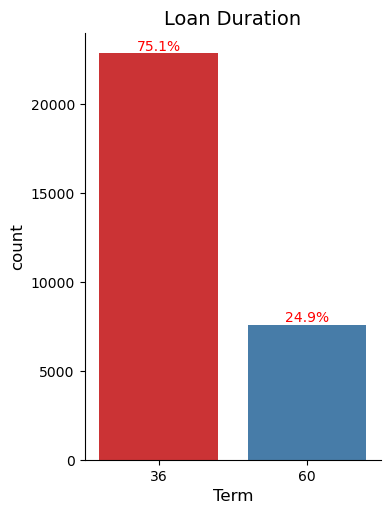

In [64]:
#Plotting categorical plot for term as Loan duration
plot = sns.catplot(x="term", kind="count", data=inp1, palette="Set1", aspect= .8);
plt.title('Loan Duration', fontsize = 14)
plt.xlabel("Term", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')
plt.show()

#### Most of the applicants have term duration for 36 months which is 74.7% and only 25% applicants for 60 months

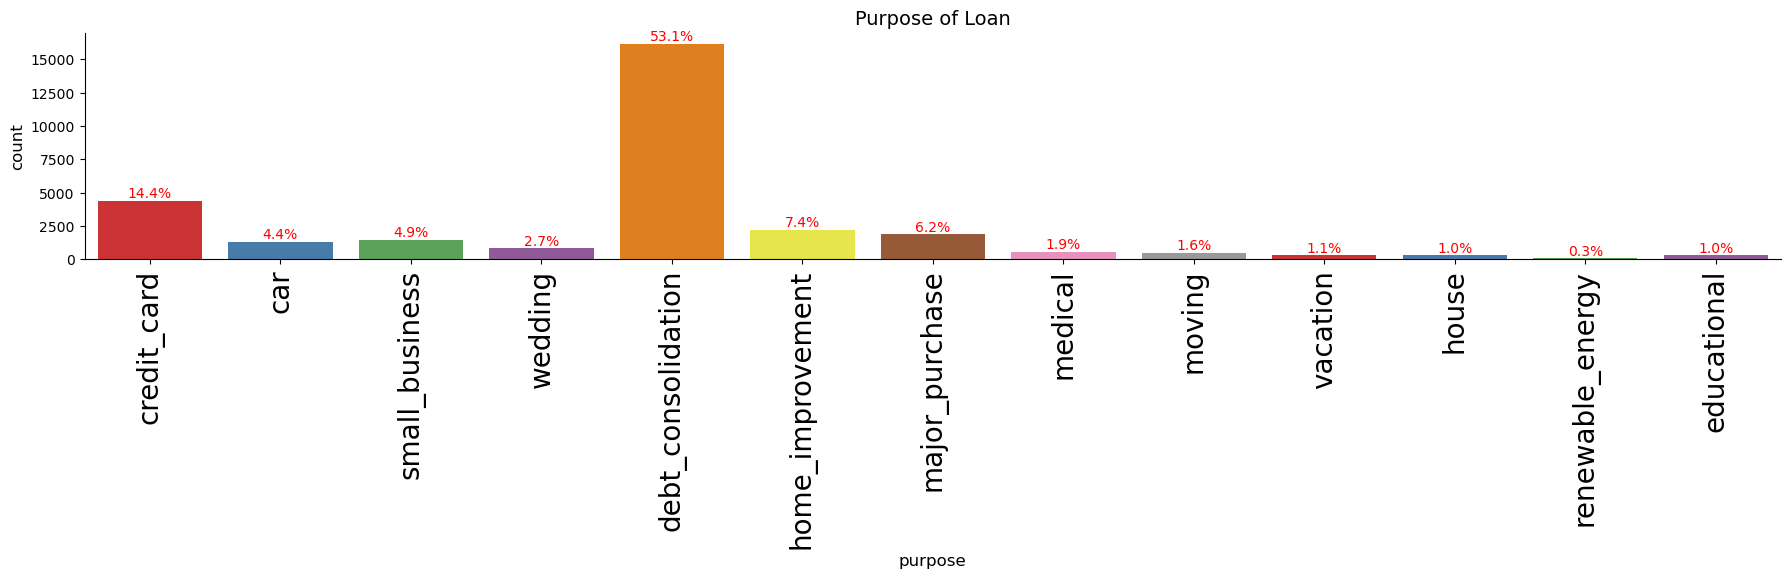

In [65]:
# Categorical plot for purpose of loan application
plot = sns.catplot(x="purpose", kind="count", data=inp1, palette="Set1",height=3, aspect=6);
plt.title('Purpose of Loan', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)
plt.xticks(rotation='vertical',fontsize= 20)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()),color='red', ha='center', va='bottom')
plt.show()

#### debt_consolidation purpose has the highest percentage of applicants taken loan from, followed by credit_card,home_improvement, major purchases, small business and the rest have less than 5%

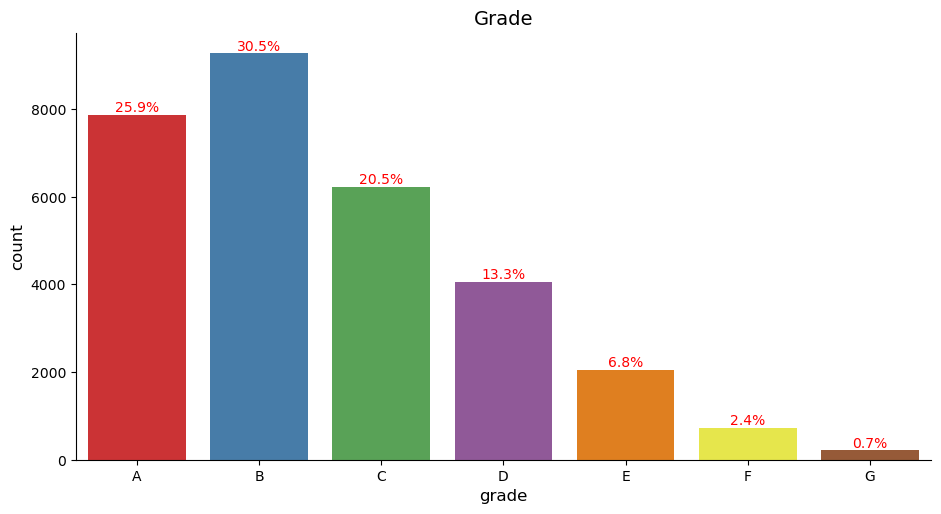

In [66]:
# Plotting categorical plot for grades. Let's see how many loan application fall under which grades.
# First creating a list of grades

grades = ['A','B','C','D','E','F','G']
plot = sns.catplot(x="grade", kind="count", data=inp1, palette="Set1", aspect= 1.9, order=grades);
plt.title('Grade', fontsize = 14)
plt.xlabel("grade", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

#### The graph shows that majority of loan application fall under grade B(30.3%) and least is G(0.8%)

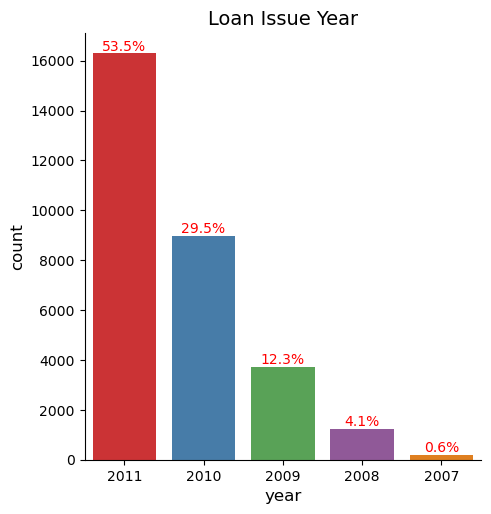

In [67]:
# Plotting loan issue year
plot = sns.catplot(x="issue_year", kind="count", data=inp1, palette="Set1", aspect=1);
plt.title('Loan Issue Year', fontsize = 14)
plt.xlabel("year", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

#### Looks like every year, loan issuing has been increased with 53.7% of issuing loan in 2011.

### Let's analyze segmented univariate data
#### Categorised employment length

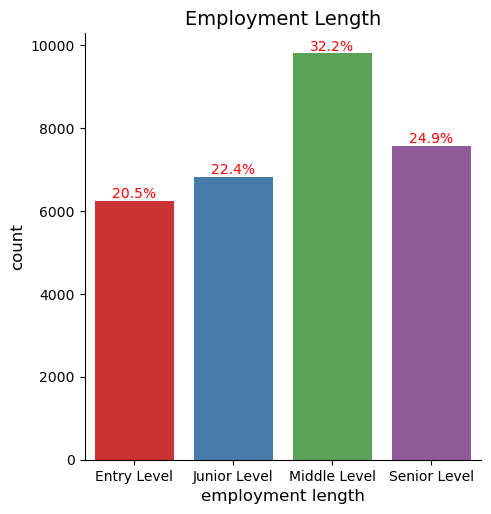

In [68]:
order_emp_category = ['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level']
plot = sns.catplot(x="categorised_emp_length", kind="count", data=inp1, palette="Set1", aspect= 1,order=order_emp_category)
plt.title('Employment Length', fontsize = 14)
plt.xlabel("employment length", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

####  Loan applicants belonging to the middle level category (31.9%)  having employment length from 4 years to 8 years

#### Categorised dti(Debt to income ratio)

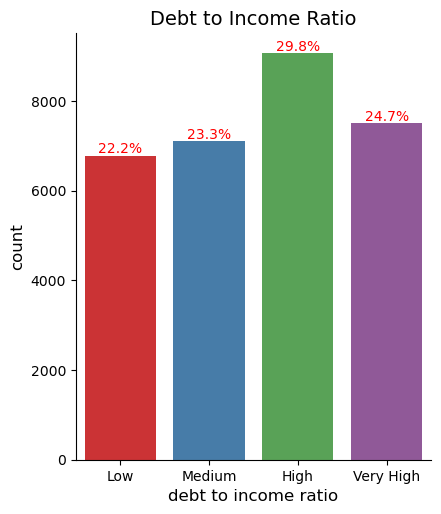

In [69]:
order_category = ['Low','Medium','High','Very High']
plot = sns.catplot(x="categorised_dti", kind="count", data=inp1, palette="Set1", aspect= .9, order=order_category);
plt.title('Debt to Income Ratio', fontsize = 14)
plt.xlabel("debt to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

#### Debt to income ratio is higher in high(29.3%) where dti between 13 to 18

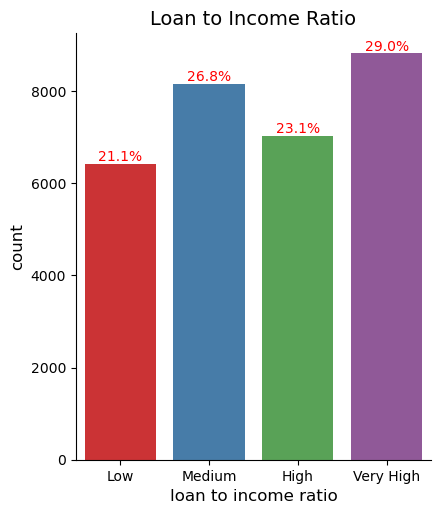

In [70]:
# Plotting Categorical plot for categorised loan income ratio
plot = sns.catplot(x="categorised_loan_inc_ratio", kind="count", data=inp1, palette="Set1", aspect= .9, order=order_category);
plt.title('Loan to Income Ratio', fontsize = 14)
plt.xlabel("loan to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

### Bivariate Analysis

#### Finding correlation among all columns containing numeric values

In [71]:
loan_correlation = inp1.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,loan_inc_ratio
loan_amnt,1.000000,0.981440,0.934034,0.351783,0.293743,0.157574,0.390359,0.106081,0.710116
funded_amnt,0.981440,1.000000,0.952327,0.331485,0.299837,0.156290,0.387052,0.104522,0.695830
funded_amnt_inv,0.934034,0.952327,1.000000,0.352544,0.292541,0.167926,0.369487,0.110576,0.658493
term,0.351783,0.331485,0.352544,1.000000,0.437044,0.117114,0.079850,0.083949,0.294562
int_rate,0.293743,0.299837,0.292541,0.437044,1.000000,0.003559,0.047403,0.110572,0.234522
emp_length,0.157574,0.156290,0.167926,0.117114,0.003559,1.000000,0.204538,0.057167,0.017101
annual_inc,0.390359,0.387052,0.369487,0.079850,0.047403,0.204538,1.000000,-0.060065,-0.266736
dti,0.106081,0.104522,0.110576,0.083949,0.110572,0.057167,-0.060065,1.000000,0.134033
loan_inc_ratio,0.710116,0.695830,0.658493,0.294562,0.234522,0.017101,-0.266736,0.134033,1.000000


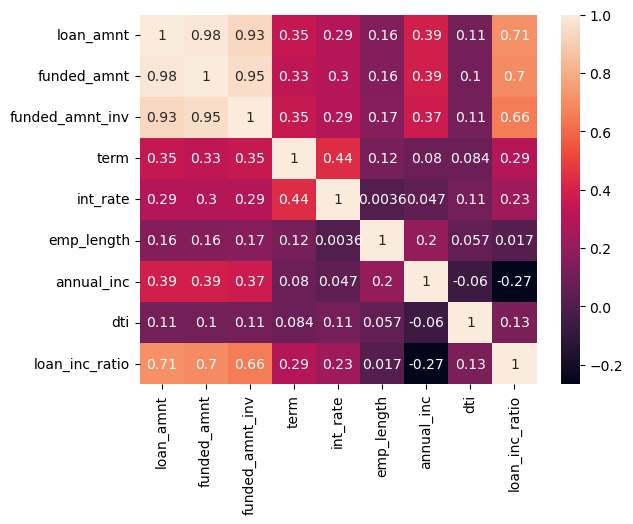

In [72]:
loan_correlation = inp1.corr()
#f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation,annot= True)
plt.show()

#### Seeing the above heatmap,there is a strong correlation among loan_amnt, funded_amnt, funded_amnt_inv. We can consider these three columns for our analysis

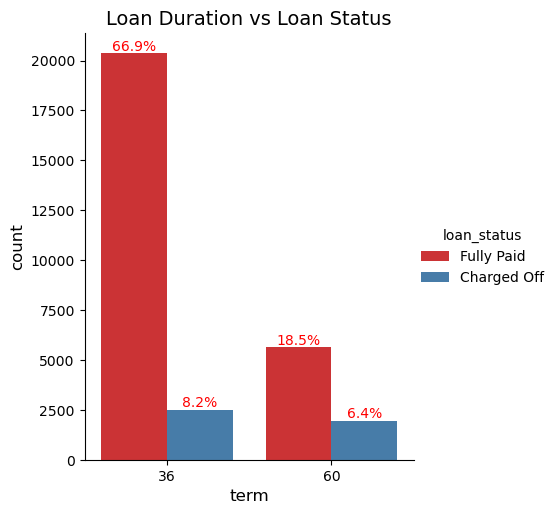

In [73]:
# Plotting catplot between term and loan_status
plot = sns.catplot(x="term", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= .9)
plt.title('Loan Duration vs Loan Status', fontsize = 14)
plt.xlabel("term", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()),
                color='red', ha='center', va='bottom')
plt.show()

#### The graph shows that there are lots of fully paid customers and defaulters having loan term for 36 months than those with 60 months.

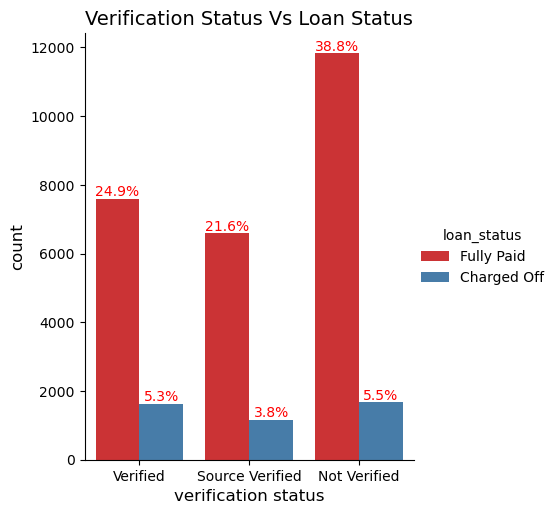

In [74]:
# PLotting between verification_status and loan_status
plot = sns.catplot(x="verification_status", hue='loan_status',kind="count", data=inp1, palette="Set1", aspect= .9)
plt.title('Verification Status Vs Loan Status', fontsize = 14)
plt.xlabel("verification status", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

#### Seems like applicants who are not verified for loan have higher number of defaulters compared to the other two.

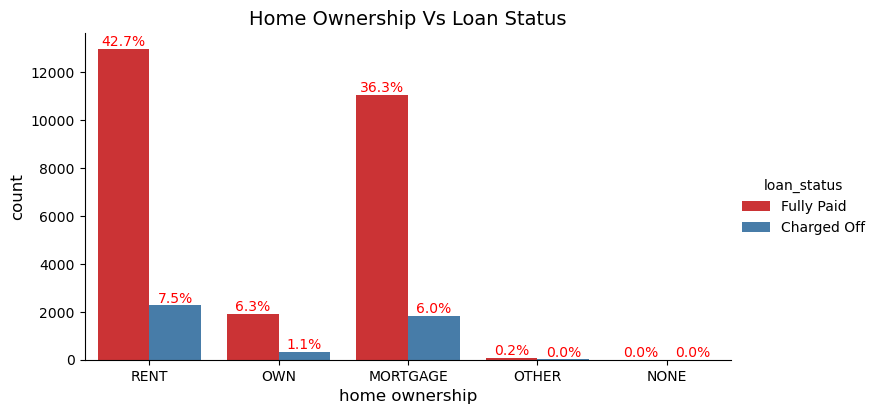

In [75]:
# Plotting home_ownership vs loan_status
plot = sns.catplot(x="home_ownership", hue='loan_status', kind="count", data=inp1, palette="Set1",height=4, aspect= 1.9);
plt.title('Home Ownership Vs Loan Status', fontsize = 14)
plt.xlabel("home ownership", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    height = int(height)
    ax.annotate('{:1.1f}%'.format((height*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., height), 
                color='red', ha='center', va='bottom')
plt.show()

#### Those who are rented are highly defaulters and highly fully paid too

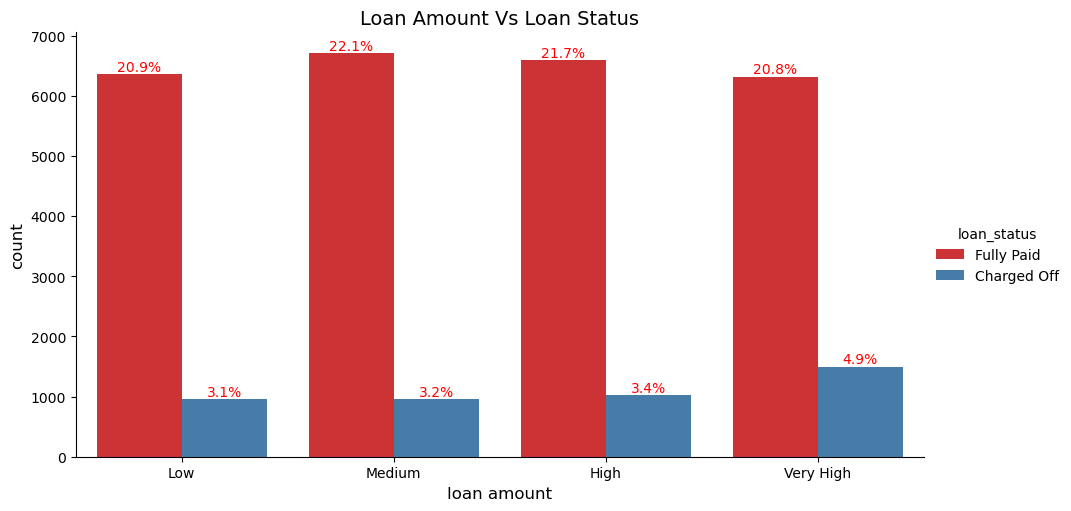

In [76]:
# Categorised_loan_smnt Vs loan_status 

plot = sns.catplot(x="categorised_loan_amnt", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= 1.9, order=order_category);
plt.title('Loan Amount Vs Loan Status', fontsize = 14)
plt.xlabel("loan amount", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


#### When the loan amount is very high, defaulters are also high

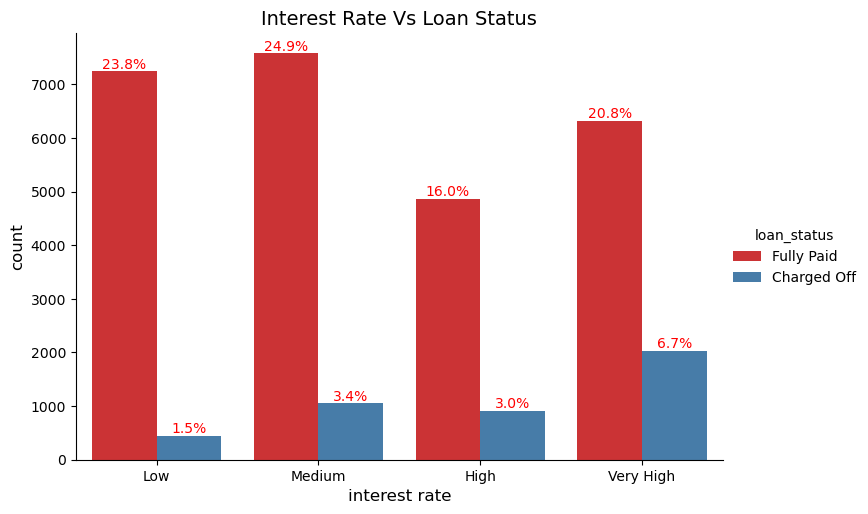

In [77]:
# Categorised_int_rate_perc Vs loan_status
plot = sns.catplot(x="categorised_int_rate_perc", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= 1.5, 
                   order=order_category);
plt.title('Interest Rate Vs Loan Status', fontsize = 14)
plt.xlabel("interest rate", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


#### Here very high defaulters when the interest rate is high.

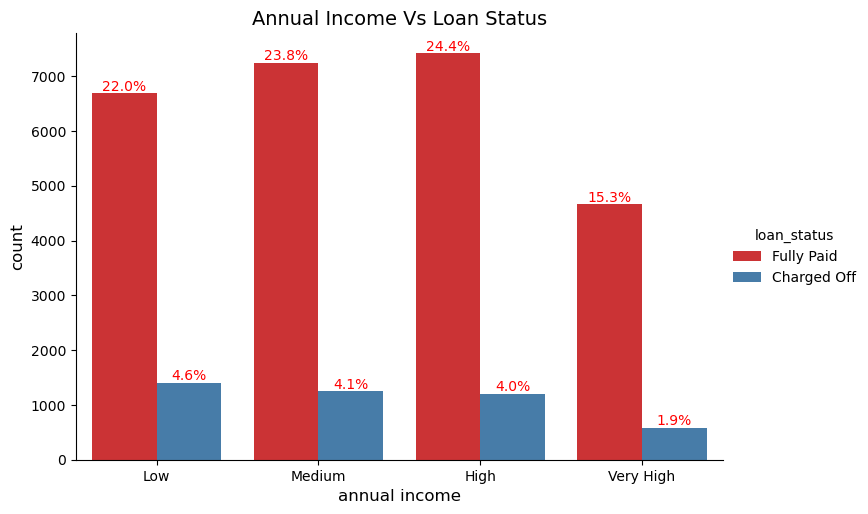

In [78]:
#Categorised_annual_inc VS loan_status
plot = sns.catplot(x="categorised_annual_inc", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= 1.5, 
                   order=order_category);
plt.title('Annual Income Vs Loan Status', fontsize = 14)
plt.xlabel("annual income", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


#### only low income applicants make high defaulters and opposite for very highly paid customers.

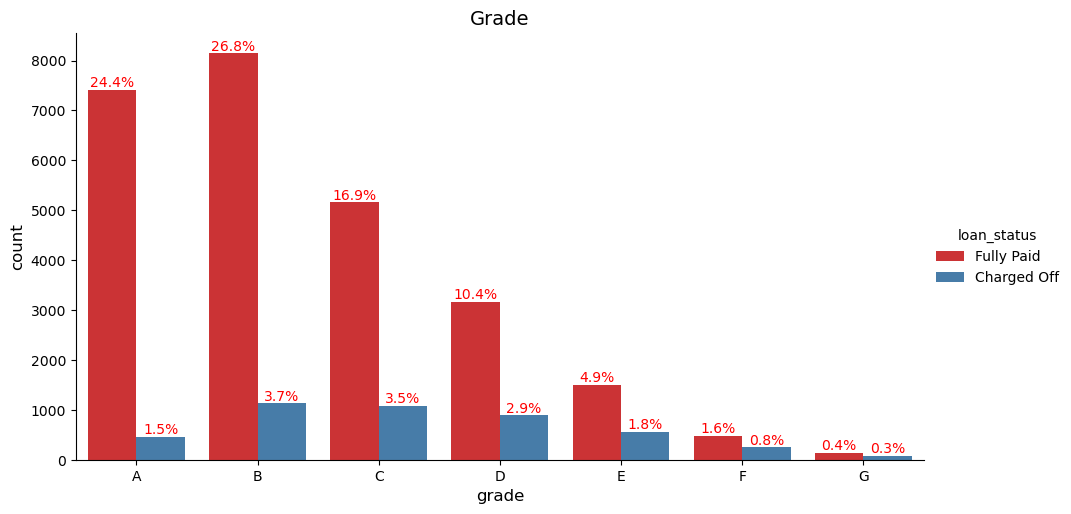

In [79]:
# Grade Vs loan_status
plot = sns.catplot(x="grade", kind="count",hue='loan_status', data=inp1, palette="Set1", aspect= 1.9, order=grades);
plt.title('Grade', fontsize = 14)
plt.xlabel("grade", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

#### As usual,like Grade B has lot of loan applicants,Its has lots of defaulters too followed by C and D

#### Considering top 5 purpose for further analysis

In [80]:
 filtered_purpose_df = inp1[(inp1['purpose']=='debt_consolidation')
                           |(inp1['purpose']=='credit_card')
                           |(inp1['purpose']=='home_improvement')
                           |(inp1['purpose']=='major_purchase')
                           |(inp1['purpose']=='small_business')]

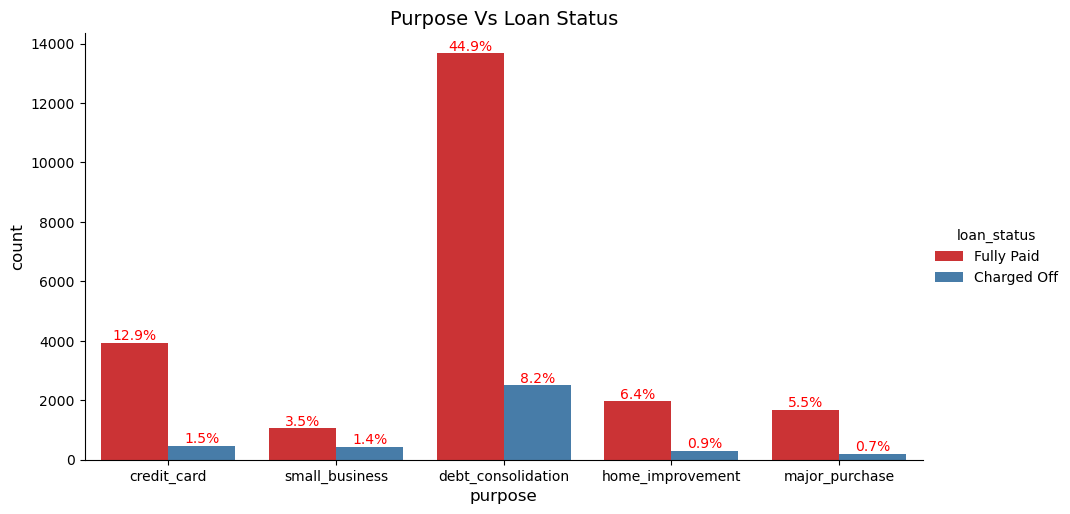

In [81]:
# Purpose Vs loan_status
plot = sns.catplot(x="purpose", hue = 'loan_status', kind="count", data=filtered_purpose_df, palette="Set1", aspect= 1.9);
plt.title('Purpose Vs Loan Status', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


####  Debt_consolidation purpose has higher number of defaulters.

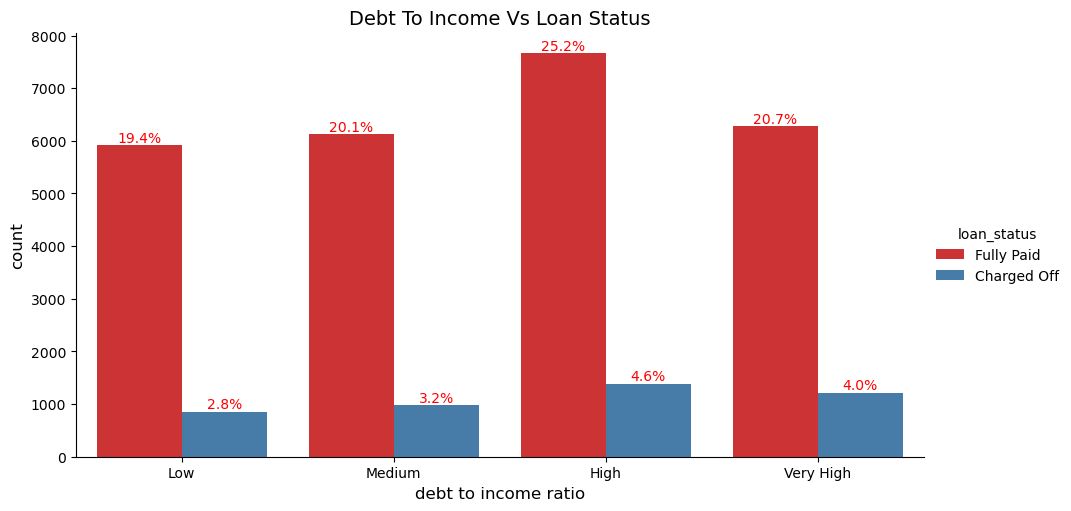

In [82]:
# Plotting Debt to income Vs Loan status
plot = sns.catplot(x="categorised_dti", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= 1.9,
                   order=order_category);
plt.title('Debt To Income Vs Loan Status', fontsize = 14)
plt.xlabel("debt to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


#### Dti is more under high category where both fully paid customers and defaulters are also high.

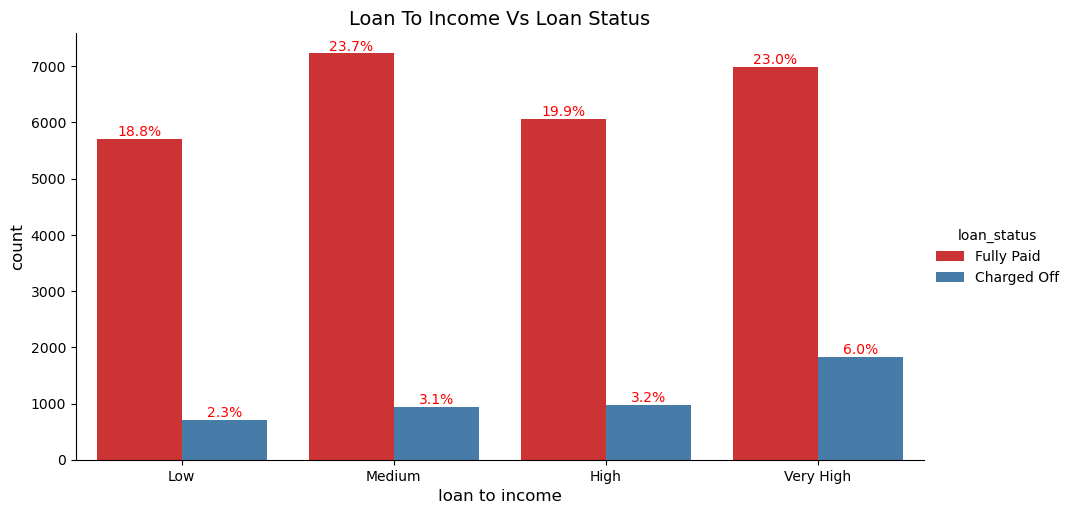

In [83]:
# Plotting Categorised loan income ratio Vs loan status
plot = sns.catplot(x="categorised_loan_inc_ratio", hue='loan_status', kind="count", data=inp1, palette="Set1", aspect= 1.9, 
                   order=order_category);
plt.title('Loan To Income Vs Loan Status', fontsize = 14)
plt.xlabel("loan to income", fontsize = 12)
plt.ylabel("count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(inp1))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()


#### More defaulters are found very high to have Loan to income ratio.

### Multivariate Analysis

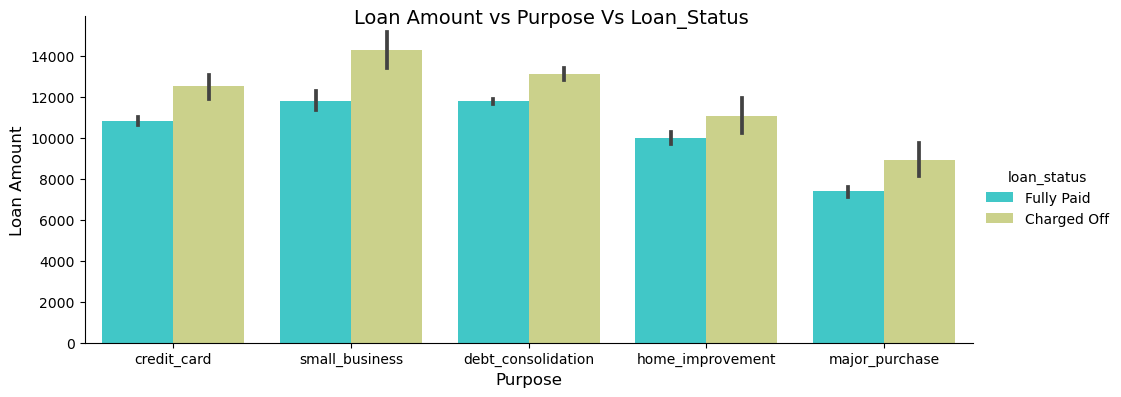

In [84]:
# Loan status VS purpose VS loan amount
plot = sns.catplot(y="loan_amnt", x="purpose", hue ='loan_status', data=filtered_purpose_df, palette='rainbow', 
            kind="bar", height=4, aspect = 2.5);
plot.fig.suptitle('Loan Amount vs Purpose Vs Loan_Status', fontsize=14)
plot.set_xlabels('Purpose', fontsize=12)
plot.set_ylabels('Loan Amount', fontsize=12)
plt.show()

#### Now Multivariate analysis is giving us clear statistics about defaulters better than univariate or bivariate analysis.

#### Now lets consider Charged_off_filtered_df as our main dataframe for our analysis. We derive it from filtered_purpose_df

In [85]:
filtered_purpose_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti,categorised_loan_amnt
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low,Very High,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium,Very High,Medium
8,5600,5600,5600.0,60,21.28,F,F2,4,OWN,40000.0,...,5.55,Dec,2011,14.000000,Medium,Very High,Middle Level,Low,Low,Medium
10,6500,6500,6500.0,60,14.65,C,C3,5,OWN,72000.0,...,16.12,Dec,2011,9.027778,Low,Very High,Middle Level,High,High,Medium


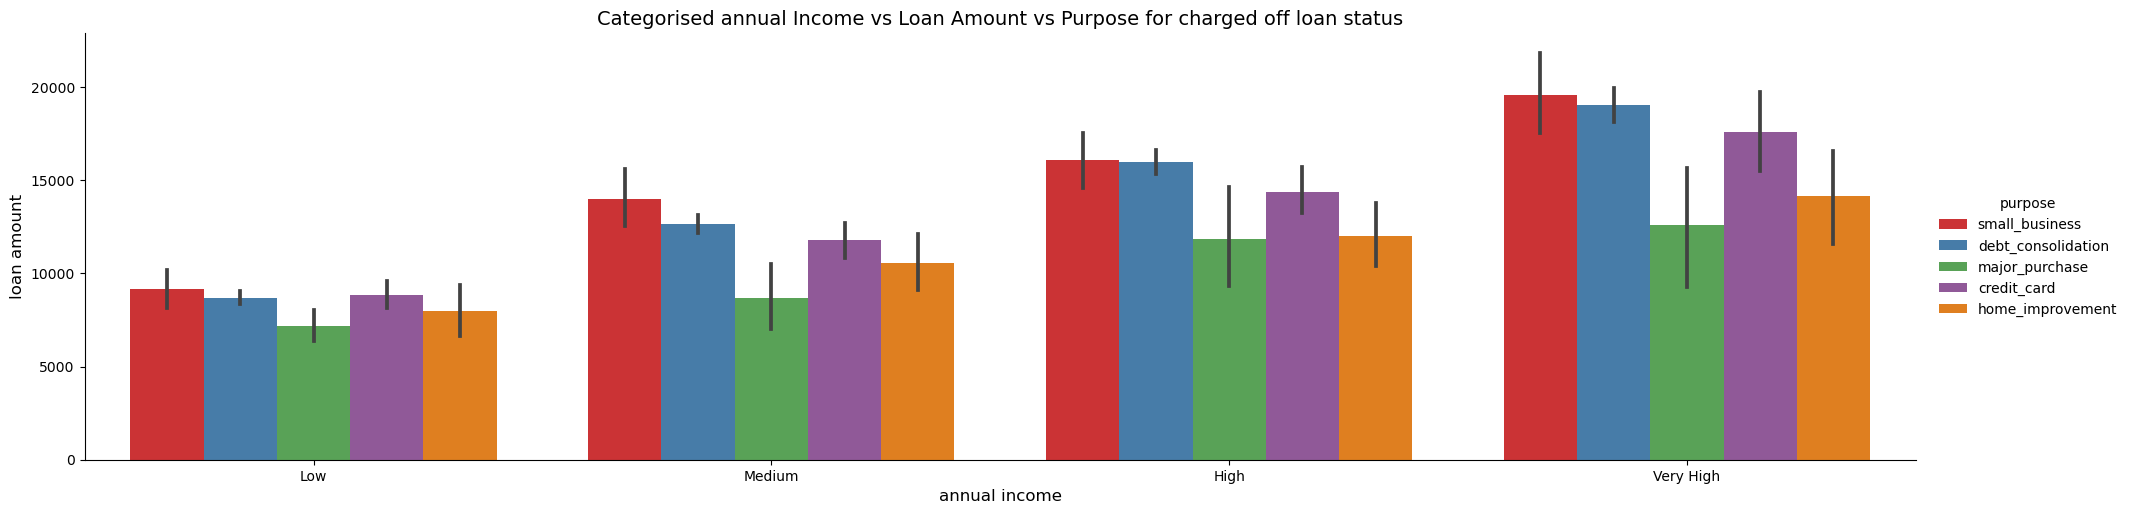

In [86]:
# Categorised Annual Income vs loan Amount vs Purpose for charged off loan Status(defaulters)

charged_off_filtered_purpose_df = filtered_purpose_df[(filtered_purpose_df['loan_status'] == 'Charged Off')]

plot = sns.catplot(x="categorised_annual_inc", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_category);

plt.title('Categorised annual Income vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("annual income", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)
plt.show()


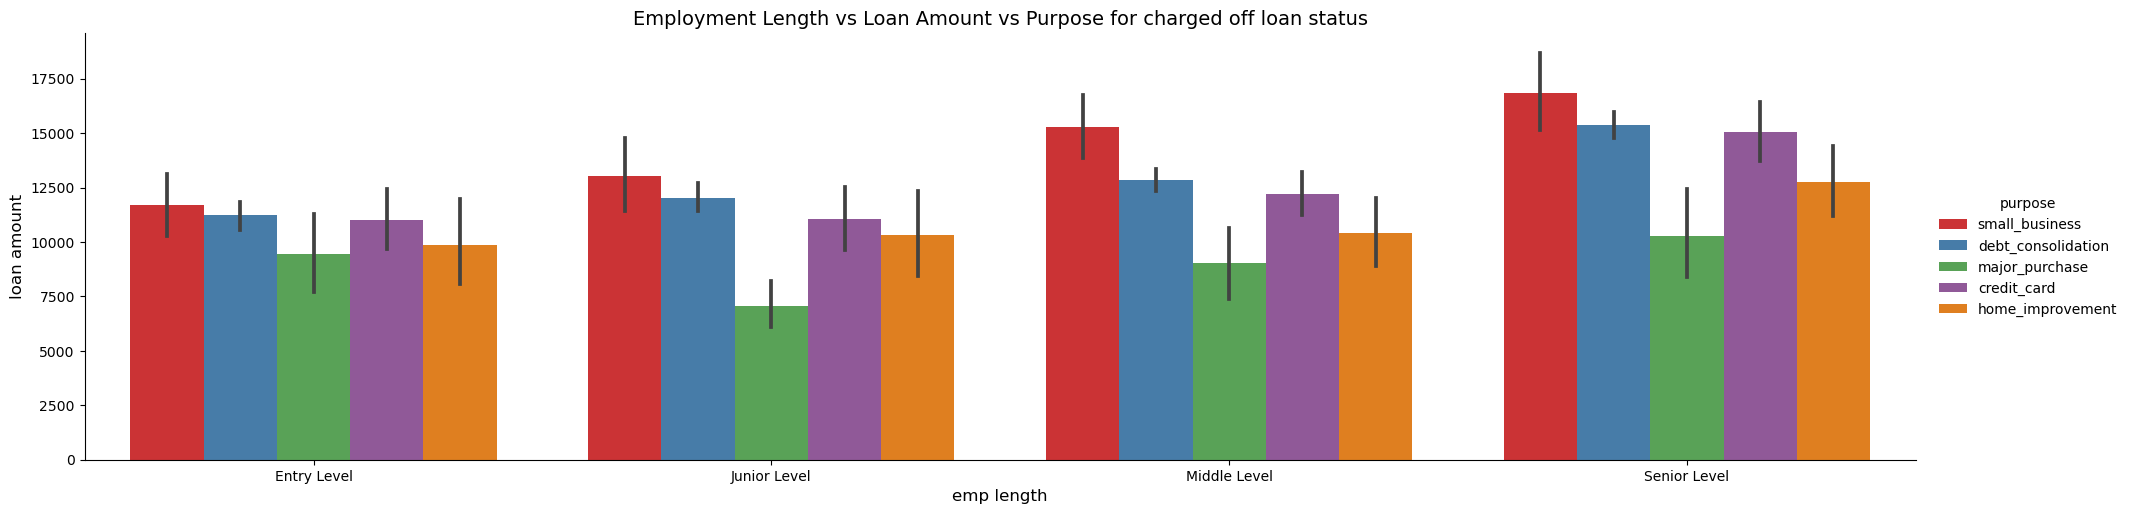

In [87]:
# categorised employment length vs loan Amount vs Purpose for charged off loan status

plot = sns.catplot(x="categorised_emp_length", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_emp_category);
plt.title('Employment Length vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("emp length", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)
plt.show()

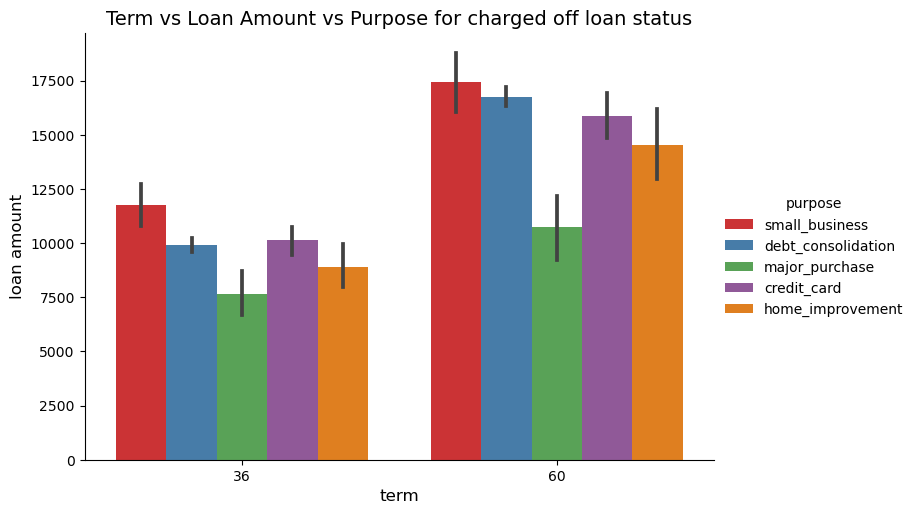

In [88]:
# Term vs loan Amount vs Purpose for charged off loan status

plot = sns.catplot(x="term", y="loan_amnt", hue='purpose', kind="bar", data=charged_off_filtered_purpose_df, palette="Set1", 
                   aspect= 1.5);
plt.title('Term vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("term", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)
plt.show()

### Summary based on Multivariate analysis:

#### - More defaulters are found in small business
#### - Applicants whose annual income is of Low, Medium and High have defaulted more on small business
#### -Even if employment length is high for small business, they are higher in defaulting.
#### - 60 months term duration for small business has defaulted more.
#### From the above inferences,we can confirm that default rate is more for loans taken on small business followed by debt consolidation

### Analysis based on loan applicants defaulting in various parameters

#### Formula is as follows:
#### Chance of the applicant will default(percentage) = 100 *[(Number of Charged Off) / (Charged Off + Fully Paid)]

In [89]:
# Using function to change the width of the bar plot
# Input parameters are the ax and new value for the width of the bar

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

In [90]:
# function to plot the map
# Input values are the crosstab, Partial Title (Field Name to be displayed in the Title), 
#                      label to be displayed in x axis, the width size of the bar in the bar chart
        
def plot_map(crosstab, partialTitle, label_name, value) :
    
    linePlot = crosstab[['percentage_defaulted']]  
    barPlot  = crosstab[['Charged Off', 'Fully Paid']]

    ax = linePlot.plot(figsize=(20,8), marker='o', color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax, rot=1, secondary_y=True, stacked=True, figsize=(15,5))  

    ax.set_title(partialTitle +' vs Percentage Default', fontsize=14)
    ax.set_xlabel(label_name,fontsize=14)
    ax.set_ylabel('Percentage of Default', color = 'b', fontsize=13)
    ax2.set_ylabel('Number of Applicants', color = 'g', fontsize=13)
    change_width(ax2, value)
    plt.show()     

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
addr_state,,,,
AL,44,320,364,12.09
AR,19,176,195,9.74
AZ,96,563,659,14.57
CA,864,4499,5363,16.11
CO,76,562,638,11.91
CT,77,486,563,13.68
DC,11,161,172,6.40
FL,409,1810,2219,18.43
GA,168,911,1079,15.57


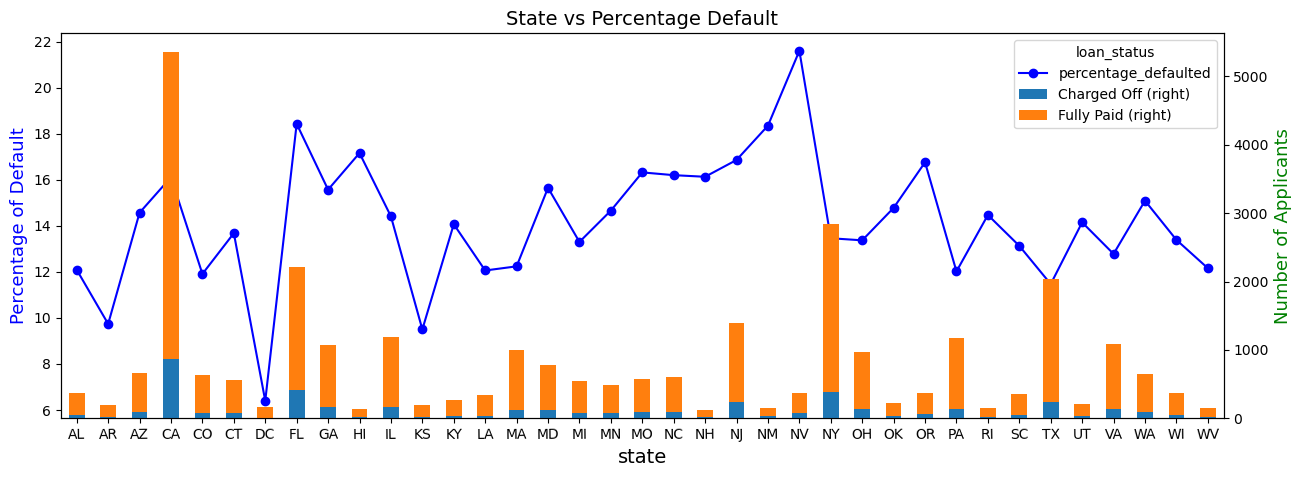

In [91]:
# Percentage of default rate in various states
# filter states such that we would only consider those states that have atleast 100 loan applicants in each states

filter_states = inp1.addr_state.value_counts()
filter_states = filter_states[(filter_states < 100)]
filter_states_df = inp1.drop(labels = inp1[inp1.addr_state.isin(filter_states.index)].index)

# Create a cross tab function

filter_states_crosstab = pd.crosstab(filter_states_df['addr_state'], filter_states_df['loan_status'], margins=True)
filter_states_crosstab.drop(filter_states_crosstab.tail(1).index,inplace=True)
filter_states_crosstab['percentage_defaulted'] = round(100*((filter_states_crosstab['Charged Off']/filter_states_crosstab['All'])),2)
display(filter_states_crosstab)

# plot the map

plot_map(filter_states_crosstab, 'State', 'state', .50) 

####  Nevada has the highest default percentage (21.22%).

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
categorised_int_rate_perc,,,,
Low,446,7242,7688,5.80
Medium,1050,7576,8626,12.17
High,917,4862,5779,15.87
Very High,2027,6317,8344,24.29


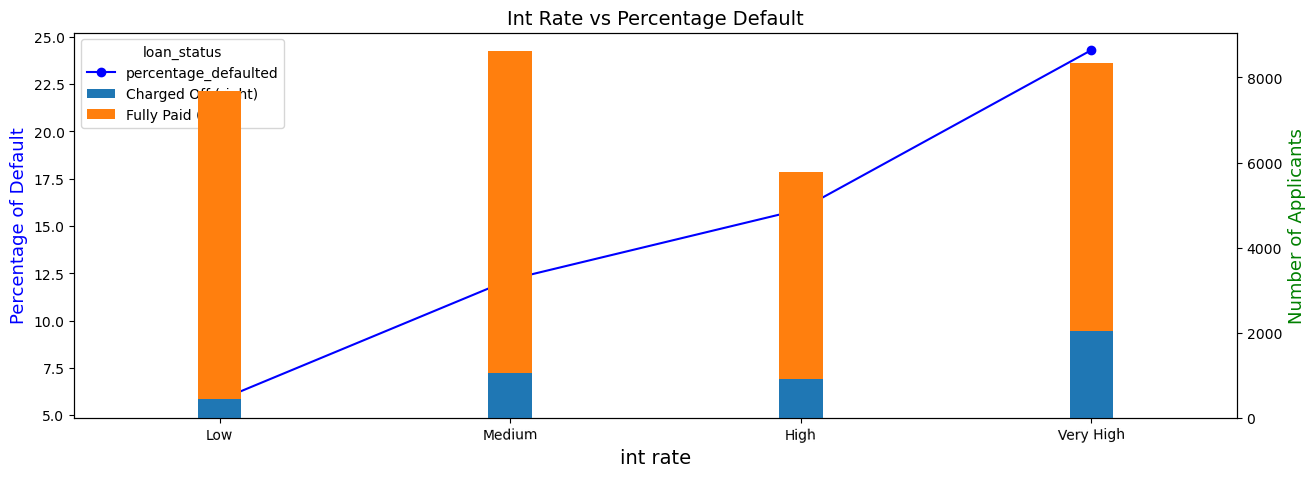

In [92]:
# Percentage default for int_rate
# sort categorised_int_rates based on custom sorting

int_rate_loan_df = inp1
int_rate_loan_df.categorised_int_rate_perc = int_rate_loan_df.categorised_int_rate_perc.astype("category")
int_rate_loan_df.categorised_int_rate_perc.cat.set_categories(order_category, inplace=True)
#int_rate_loan_df.sort_values(["categorised_int_rate_perc"])

# Create a cross tab function

int_rate_crosstab = pd.crosstab(int_rate_loan_df['categorised_int_rate_perc'], int_rate_loan_df['loan_status'], margins=True)
int_rate_crosstab.drop(int_rate_crosstab.tail(1).index,inplace=True)
int_rate_crosstab['percentage_defaulted'] = round(100*((int_rate_crosstab['Charged Off']/int_rate_crosstab['All'])),2)
display(int_rate_crosstab)

# plot the map

plot_map(int_rate_crosstab, 'Int Rate', 'int rate', .15)  


In [93]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30437 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   30437 non-null  int64   
 1   funded_amnt                 30437 non-null  int64   
 2   funded_amnt_inv             30437 non-null  float64 
 3   term                        30437 non-null  int32   
 4   int_rate                    30437 non-null  float64 
 5   grade                       30437 non-null  object  
 6   sub_grade                   30437 non-null  object  
 7   emp_length                  30437 non-null  int32   
 8   home_ownership              30437 non-null  object  
 9   annual_inc                  30437 non-null  float64 
 10  verification_status         30437 non-null  object  
 11  issue_d                     30437 non-null  object  
 12  loan_status                 30437 non-null  object  
 13  purpose         

#### Customers who have taken a very high interest (>= 14%) rates are bound to default.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
purpose,,,,
credit_card,465,3928,4393,10.59
debt_consolidation,2494,13671,16165,15.43
home_improvement,285,1957,2242,12.71
major_purchase,199,1684,1883,10.57
small_business,423,1055,1478,28.62


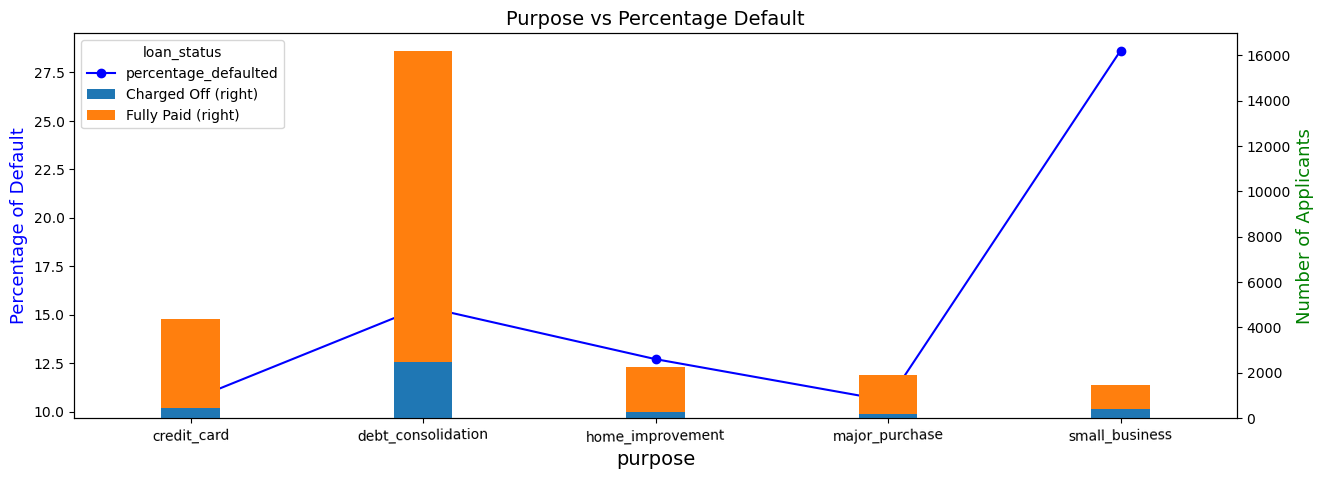

In [94]:
# Creating cross tab function
purposecrosstab = pd.crosstab(filtered_purpose_df['purpose'], filtered_purpose_df['loan_status'], margins=True)
purposecrosstab.drop(purposecrosstab.tail(1).index,inplace=True)
purposecrosstab['percentage_defaulted'] = round(100*((purposecrosstab['Charged Off']/purposecrosstab['All'])),2)
display(purposecrosstab)

plot_map(purposecrosstab, 'Purpose', 'purpose', .25) 



#### Small business loan has higher defaulters

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
grade,,,,
A,461,7414,7875,5.85
B,1131,8144,9275,12.19
C,1075,5157,6232,17.25
D,889,3164,4053,21.93
E,556,1500,2056,27.04
F,246,485,731,33.65
G,82,133,215,38.14


loan_status,Charged Off,Fully Paid,All,percentage_defaulted
sub_grade,,,,
A1,23,831,854,2.69
A2,57,1119,1176,4.85
A3,70,1333,1403,4.99
A4,139,2134,2273,6.12
A5,172,1997,2169,7.93
B1,126,1285,1411,8.93
B2,172,1437,1609,10.69
B3,279,1945,2224,12.54
B4,264,1670,1934,13.65


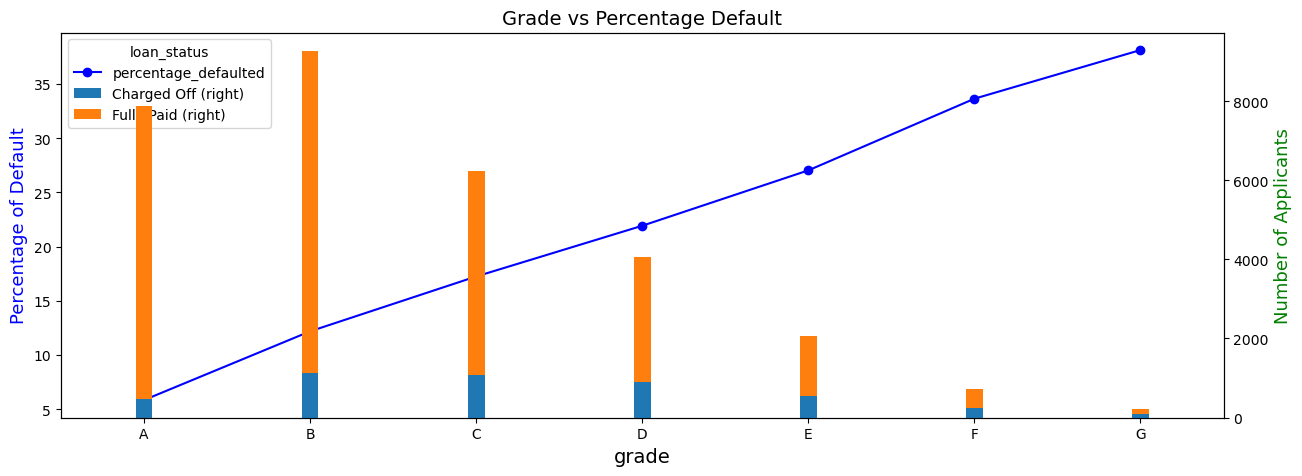

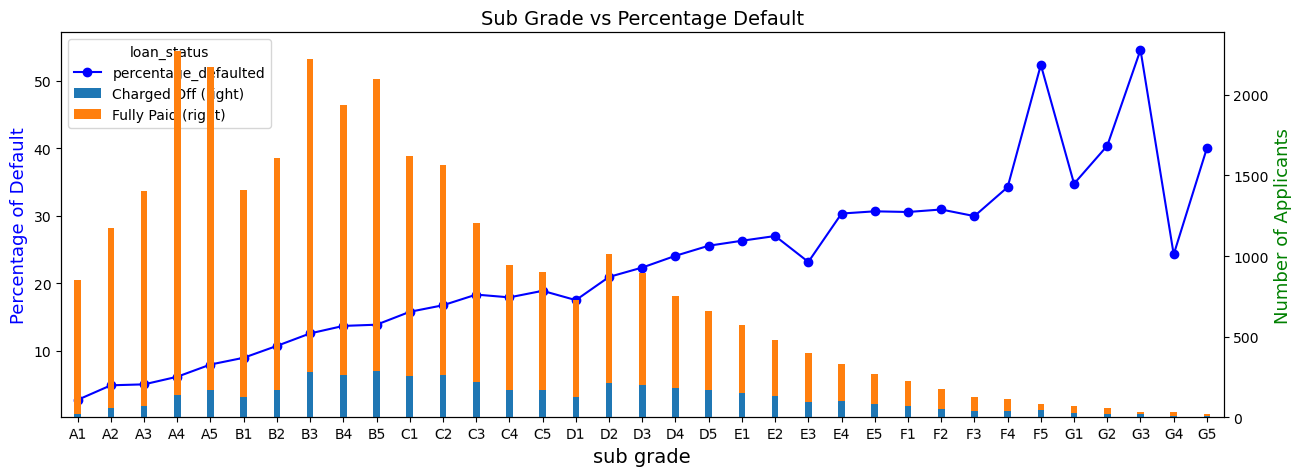

In [95]:
# Percentage default for Grade
# sort grade based on custom sorting

grade_df = inp1
grade_df.sort_values(["grade"])

sub_grade_df = inp1
sub_grade_df.sort_values(["sub_grade"])

# Create a cross tab function

grade_crosstab = pd.crosstab(grade_df['grade'], grade_df['loan_status'], margins=True)
grade_crosstab.drop(grade_crosstab.tail(1).index,inplace=True)
grade_crosstab['percentage_defaulted'] = round(100*((grade_crosstab['Charged Off']/grade_crosstab['All'])),2)
display(grade_crosstab)

sub_grade_cross_tab = pd.crosstab(grade_df['sub_grade'], sub_grade_df['loan_status'], margins=True)
sub_grade_cross_tab.drop(sub_grade_cross_tab.tail(1).index,inplace=True)
sub_grade_cross_tab['percentage_defaulted'] = round(100*((sub_grade_cross_tab['Charged Off']/sub_grade_cross_tab['All'])),2)
display(sub_grade_cross_tab)

plot_map(grade_crosstab, 'Grade', 'grade', .10)
plot_map(sub_grade_cross_tab, 'Sub Grade', 'sub grade', .20)

#### From the above graphs,it is shown that the probability that applicant would default will increase from A to G grades.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
categorised_annual_inc,,,,
Low,1406,6686,8092,17.38
Medium,1247,7239,8486,14.69
High,1208,7414,8622,14.01
Very High,579,4658,5237,11.06


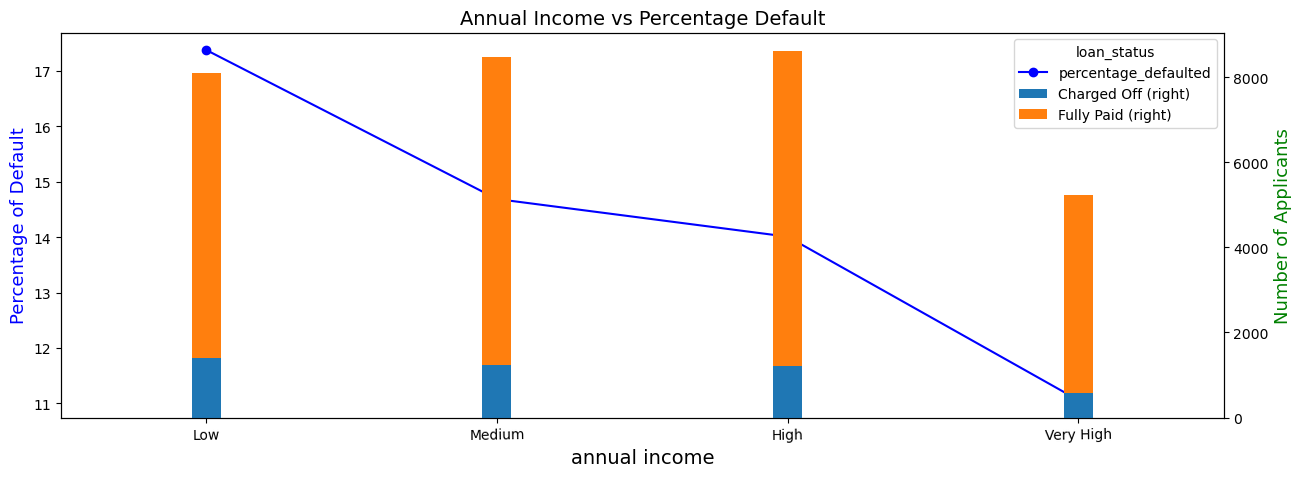

In [96]:
# Percentage default for Annual Income
# sort categorised_annual_inc based on custom sorting

annual_inc_df = inp1
annual_inc_df.categorised_annual_inc = annual_inc_df.categorised_annual_inc.astype("category")
annual_inc_df.categorised_annual_inc.cat.set_categories(order_category, inplace=True)
annual_inc_df.sort_values(["categorised_annual_inc"])

# Create a cross tab function

annual_inc_crosstab = pd.crosstab(annual_inc_df['categorised_annual_inc'], annual_inc_df['loan_status'], margins=True)
annual_inc_crosstab.drop(annual_inc_crosstab.tail(1).index,inplace=True)
annual_inc_crosstab['percentage_defaulted'] = round(100*((annual_inc_crosstab['Charged Off']/annual_inc_crosstab['All'])),2)
display(annual_inc_crosstab)

plot_map(annual_inc_crosstab, 'Annual Income', 'annual income', .10)

#### It is seen that applicants with low income tends to default more.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
emp_length,,,,
0,527,3131,3658,14.41
1,382,2204,2586,14.77
2,460,3066,3526,13.05
3,461,2835,3296,13.99
4,380,2384,2764,13.75
5,383,2259,2642,14.50
6,257,1559,1816,14.15
7,218,1206,1424,15.31
8,166,984,1150,14.43


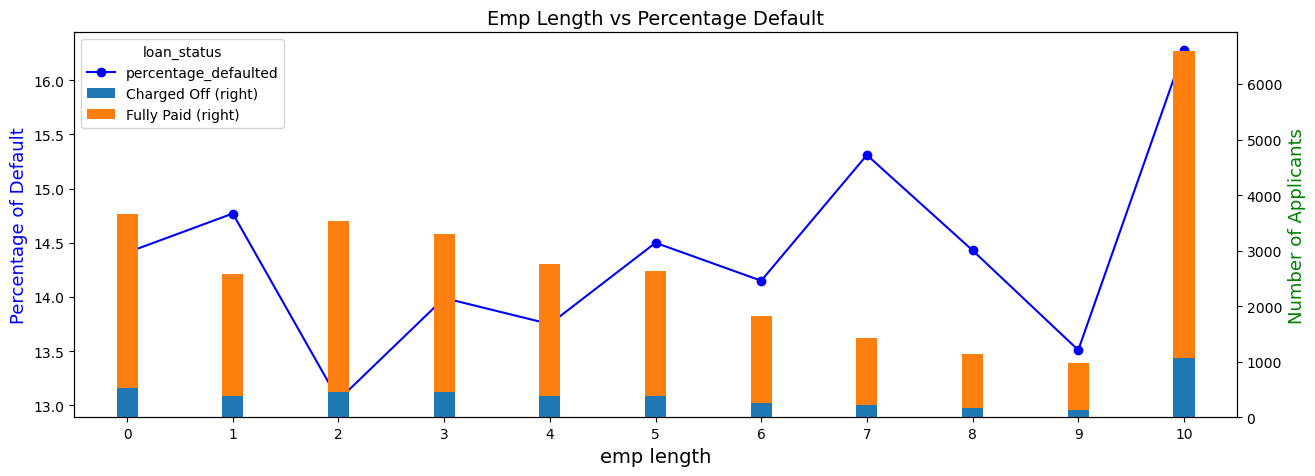

In [97]:
# Percentage default for Employment length
# Create a cross tab function

emp_length_crosstab = pd.crosstab(inp1['emp_length'], inp1['loan_status'], margins=True)
emp_length_crosstab.drop(emp_length_crosstab.tail(1).index,inplace=True)
emp_length_crosstab['percentage_defaulted'] = round(100*((emp_length_crosstab['Charged Off']/emp_length_crosstab['All'])),2)
display(emp_length_crosstab)

plot_map(emp_length_crosstab, 'Emp Length', 'emp length', .20)

#### Applicants with Employment length of 5 years to 8 years have higher percentage of defaulters

###  Conclusion :

####         It can be inferred from our analysis that those who have loans with high interest rate, who are of low income group ,mid level and senior level in employment,those who opted for small business loans have more probability of defaulting.

####        Thus, bank has to take measures for avoiding risky situations by reducing loan amount or reject loans for such defaulters and in future to come.
